In [1]:
pip install tensorflow==2.1.0


     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 40.7MB/s 
     |████████████████████████████████| 450kB 43.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=0f7d2054fc828c13205314081d783bc70c681118beaaa58845ef05e40d30a157
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [2]:
pip install keras==2.3.1


     |████████████████████████████████| 378kB 5.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

Using TensorFlow backend.


2.3.1
2.1.0


In [4]:
train_data_path = '/content/drive/My Drive/Mask Detection/dataset-2/train'
validation_data_path = '/content/drive/My Drive/Mask Detection/dataset-2/valid'

In [12]:
#show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [7]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')

Found 3649 images belonging to 2 classes.


In [8]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [9]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


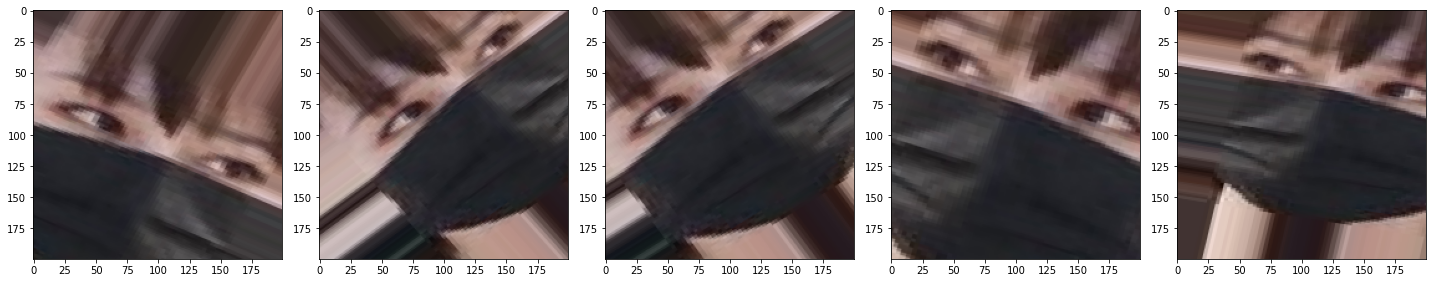

In [13]:
images  = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [14]:
model_path = '/content/drive/My Drive/Mask Detection/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor = 'val_accuracy', verbose =1, save_best_only = True, mode= 'max')
callbacks_list = [checkpoint]

In [19]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
                                     

In [20]:
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = cnn_model.fit(training_data, 
                  epochs =50,
                  verbose =1,
                  validation_data = valid_data,
                  )

Epoch 1/50
 8/29 [=======>......................] - ETA: 2:43 - loss: 0.3048 - accuracy: 0.8828

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 202s 7s/step - loss: 0.3113 - accuracy: 0.8852 - val_loss: 0.1128 - val_accuracy: 0.9293
Epoch 2/50
29/29 [==============================] - 195s 7s/step - loss: 0.2865 - accuracy: 0.8981 - val_loss: 0.1735 - val_accuracy: 0.9107
Epoch 3/50
29/29 [==============================] - 196s 7s/step - loss: 0.2962 - accuracy: 0.8901 - val_loss: 0.2512 - val_accuracy: 0.9479
Epoch 4/50
29/29 [==============================] - 195s 7s/step - loss: 0.2848 - accuracy: 0.8920 - val_loss: 0.1687 - val_accuracy: 0.9553
Epoch 5/50
29/29 [==============================] - 195s 7s/step - loss: 0.2609 - accuracy: 0.9055 - val_loss: 0.1011 - val_accuracy: 0.9479
Epoch 6/50
29/29 [==============================] - 195s 7s/step - loss: 0.2664 - accuracy: 0.8983 - val_loss: 0.0981 - val_accuracy: 0.9429
Epoch 7/50
29/29 [==============================] - 194s 7s/step - loss: 0.2513 - accuracy: 0.9065 - val_loss: 0.0926 - val_accuracy: 0.9342
Epoch 8/50
29/29 [======

In [ ]:
'''history = cnn_model.fit(training_data, 
                  epochs =50,
                  verbose =1,
                  validation_data = valid_data,
                  callbacks = callbacks_list
                  )

In [23]:
cnn_model.save('/content/drive/My Drive/Mask Detection/model.h5')